<a href="https://colab.research.google.com/github/Kvaishwarya/AI-ML/blob/main/FinalAnalysisdataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USING 4 CLUSTER

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
File=('/content/sample_data/Mall_Customers_Updated.csv')
data=pd.read_csv(File)
print(data.head)

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

    TransactionDate Temporal Pattern     Month  
0       

In [ ]:
print('Missing value\n',data.isnull().sum())
print('\n\n')
print('Summary statistics\n',data.describe())

Missing value
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
TransactionDate           0
Temporal Pattern          0
Month                     0
dtype: int64



Summary statistics
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Handle Temporal Features
Recency: Days since the last transaction.
Month: Extracted from TransactionDate.
Temporal Pattern: Categorical feature (encoded)

In [ ]:
# Convert TransactionDate to datetime
data['TransactionDate']=pd.to_datetime(data['TransactionDate'])

In [ ]:
# (days since last transaction)
data['Recency']=data['TransactionDate'].max()-data['TransactionDate']

In [ ]:
# Extracting  Month from TransactionDate
data['Month']=data['TransactionDate'].dt.month

In [ ]:
#Encode temporal pattern
temporal_encoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap
temporal_encoded = temporal_encoder.fit_transform(data[['Temporal Pattern']]).toarray()
temporal_encoded_df = pd.DataFrame(temporal_encoded, columns=temporal_encoder.get_feature_names_out(['Temporal Pattern']))

# Concatenate encoded temporal features
df = pd.concat([data, temporal_encoded_df], axis=1)


**select Features for Clustering

Annual Income (k$)
Spending Score (1-100)
Recency
Month
Temporal Pattern (encoded)**

In [ ]:
features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Recency', 'Month'] + list(temporal_encoded_df.columns)
clustering_data = df[features]

print("\nSelected Features for Clustering:\n", clustering_data.head())



Selected Features for Clustering:
    Annual Income (k$)  Spending Score (1-100)   Recency  Month  \
0                  15                      39 1081 days      1   
1                  15                      81  265 days      4   
2                  16                       6  618 days      4   
3                  16                      77  237 days      5   
4                  17                      40  400 days     11   

   Temporal Pattern_Low  Temporal Pattern_Seasonal  
0                   0.0                        1.0  
1                   0.0                        0.0  
2                   1.0                        0.0  
3                   0.0                        0.0  
4                   0.0                        1.0  


In [ ]:
# Convert 'Recency' column to numerical representation (days)
clustering_data['Recency'] = clustering_data['Recency'].dt.days

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

KMEANS

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_dbi = davies_bouldin_score(scaled_data, kmeans_labels)

print("\n--- K-Means Clustering ---")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_dbi:.4f}")



--- K-Means Clustering ---
Silhouette Score: 0.3541
Davies-Bouldin Index: 1.1418


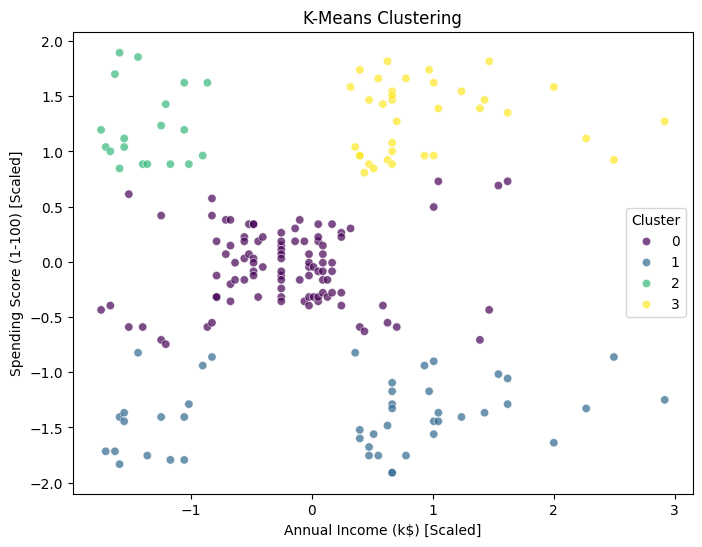

In [ ]:
# K-Means Cluster Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_data[:, 0], y=scaled_data[:, 1],
    hue=kmeans_labels,
    palette='viridis',
    legend='full',
    alpha=0.7
)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$) [Scaled]')
plt.ylabel('Spending Score (1-100) [Scaled]')
plt.legend(title='Cluster')
plt.show()


Hiearchical Clustering

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')#Defines the method used to determine the distance between clusters. 'ward' minimizes the variance within each cluster.
hierarchical_labels = hierarchical.fit_predict(scaled_data)

hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
hierarchical_dbi = davies_bouldin_score(scaled_data, hierarchical_labels)

print("\n--- Hierarchical Clustering ---")
print(f"Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"Davies-Bouldin Index: {hierarchical_dbi:.4f}")



--- Hierarchical Clustering ---
Silhouette Score: 0.2916
Davies-Bouldin Index: 1.1537


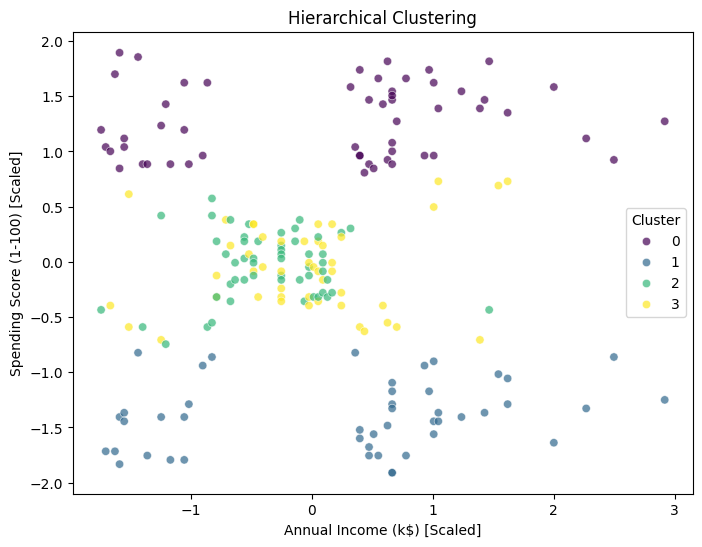

In [ ]:
# Hierarchical Cluster Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_data[:, 0], y=scaled_data[:, 1],
    hue=hierarchical_labels,
    palette='viridis',
    legend='full',
    alpha=0.7
)
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$) [Scaled]')
plt.ylabel('Spending Score (1-100) [Scaled]')
plt.legend(title='Cluster')
plt.show()


DBSCAN Clustering with Parameter Tuning

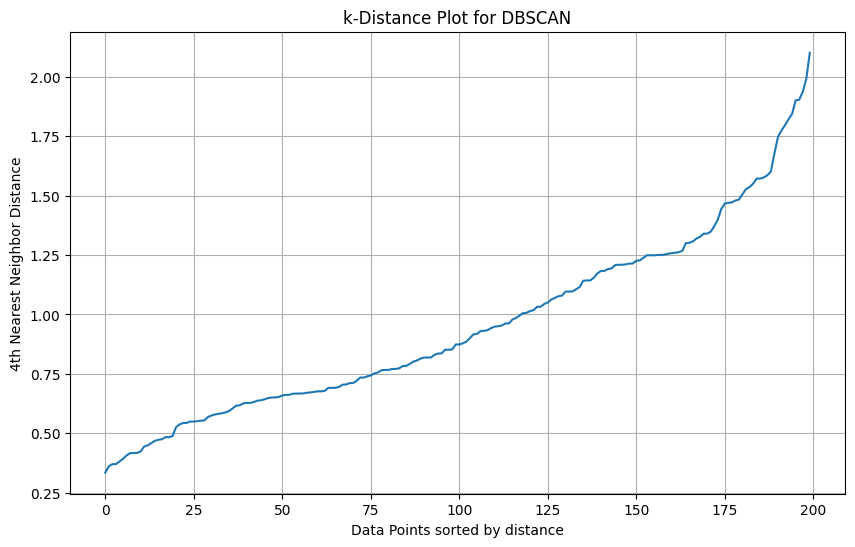

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort the distances
distances = np.sort(distances[:, 4])  # 4th nearest neighbor
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("k-Distance Plot for DBSCAN")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()


After inspecting the k-distance plot, choose an eps value at the "elbow" point.

For demonstration, let's assume eps=0.5:




In [ ]:
# DBSCAN Clustering with tuned parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Number of clusters (excluding noise if any)
unique_labels = set(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in dbscan_labels else 0)
print(f"\nNumber of clusters found by DBSCAN: {n_clusters}")

# Evaluate DBSCAN if more than one cluster is found
if n_clusters > 1:
    non_noise = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(scaled_data[non_noise], dbscan_labels[non_noise])
    dbscan_dbi = davies_bouldin_score(scaled_data[non_noise], dbscan_labels[non_noise])
    print("\n--- DBSCAN Clustering ---")
    print(f"Silhouette Score: {dbscan_silhouette:.4f}")
    print(f"Davies-Bouldin Index: {dbscan_dbi:.4f}")
else:
    dbscan_silhouette, dbscan_dbi = np.nan, np.nan
    print("\nDBSCAN did not find enough clusters to calculate Silhouette Score and Davies-Bouldin Index.")



Number of clusters found by DBSCAN: 4

--- DBSCAN Clustering ---
Silhouette Score: 0.5543
Davies-Bouldin Index: 0.5952


Comparing

In [ ]:
results = {
    "Algorithm": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette],
    "Davies-Bouldin Index": [kmeans_dbi, hierarchical_dbi, dbscan_dbi]
}
results_df = pd.DataFrame(results)
print("\n--- Clustering Evaluation Metrics ---")
print(results_df)



--- Clustering Evaluation Metrics ---
      Algorithm  Silhouette Score  Davies-Bouldin Index
0       K-Means          0.354096              1.141824
1  Hierarchical          0.291588              1.153692
2        DBSCAN          0.554347              0.595160


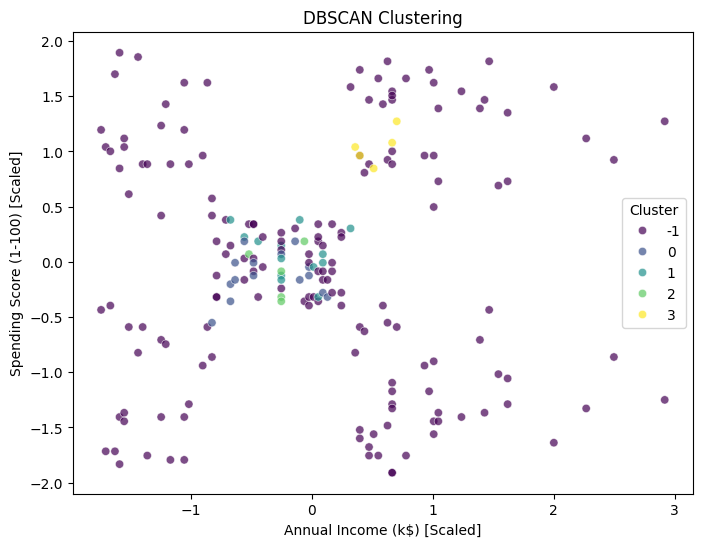

In [ ]:
# DBSCAN Cluster Plot
if n_clusters > 1:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        x=scaled_data[:, 0], y=scaled_data[:, 1],
        hue=dbscan_labels,
        palette='viridis',
        legend='full',
        alpha=0.7
    )
    plt.title('DBSCAN Clustering')
    plt.xlabel('Annual Income (k$) [Scaled]')
    plt.ylabel('Spending Score (1-100) [Scaled]')
    plt.legend(title='Cluster')
    plt.show()
else:
    print("\nDBSCAN did not produce multiple clusters to visualize.")


final conclusion

In [ ]:
# Determine the best algorithm based on Silhouette Score and Davies-Bouldin Index
# Higher Silhouette Score and lower Davies-Bouldin Index are better

# Drop algorithms where metrics are not available (e.g., DBSCAN with single cluster)
valid_results = results_df.dropna()

# Normalize Silhouette Score and Davies-Bouldin Index for combined ranking
from sklearn.preprocessing import MinMaxScaler

scaler_metrics = MinMaxScaler()
scaled_metrics = scaler_metrics.fit_transform(valid_results[['Silhouette Score', 'Davies-Bouldin Index']])

# Higher Silhouette is better, lower DBI is better. To combine, invert DBI scaling.
scaled_metrics[:, 1] = 1 - scaled_metrics[:, 1]

# Calculate a combined score
valid_results['Combined Score'] = scaled_metrics.sum(axis=1)

# Identify the best algorithm
best_algorithm = valid_results.loc[valid_results['Combined Score'].idxmax(), 'Algorithm']
print(f"\nThe best clustering algorithm for this dataset is: {best_algorithm}")



The best clustering algorithm for this dataset is: DBSCAN


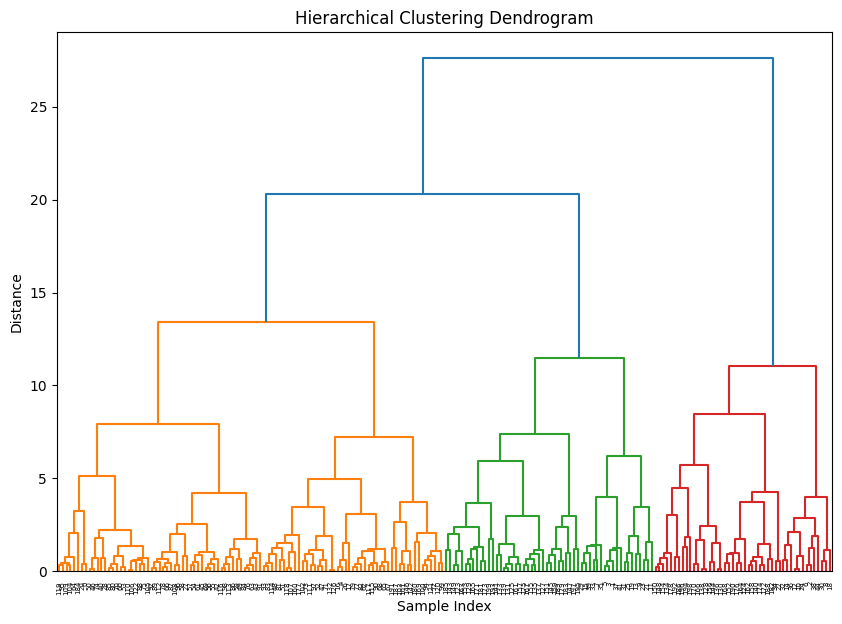

In [ ]:
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


2 cluster

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data_path = '/content/sample_data/Mall_Customers_Updated.csv'
data = pd.read_csv(data_path)

# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Calculate Recency (days since last transaction)
data['Recency'] = (data['TransactionDate'].max() - data['TransactionDate']).dt.days

# Extracting Month from TransactionDate
data['Month'] = data['TransactionDate'].dt.month

# Encode temporal pattern
temporal_encoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap
temporal_encoded = temporal_encoder.fit_transform(data[['Temporal Pattern']]).toarray()
temporal_encoded_df = pd.DataFrame(temporal_encoded, columns=temporal_encoder.get_feature_names_out(['Temporal Pattern']))

# Concatenate encoded temporal features
df = pd.concat([data, temporal_encoded_df], axis=1)

# Step 1: Feature Selection (Temporal + Relative Feature)
selected_features = ['Recency', 'Spending Score (1-100)']
data_selected = df[selected_features]

# Step 2: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)

# Step 3: K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_dbi = davies_bouldin_score(scaled_data, kmeans_labels)

# Step 4: Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(scaled_data)
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
hierarchical_dbi = davies_bouldin_score(scaled_data, hierarchical_labels)

# Step 5: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Handle noise in DBSCAN for evaluation
non_noise = dbscan_labels != -1
if non_noise.any():
    dbscan_silhouette = silhouette_score(scaled_data[non_noise], dbscan_labels[non_noise])
    dbscan_dbi = davies_bouldin_score(scaled_data[non_noise], dbscan_labels[non_noise])
else:
    dbscan_silhouette = None
    dbscan_dbi = None

# Step 6: Results Comparison
print("K-Means: Silhouette Score =", kmeans_silhouette, ", DBI =", kmeans_dbi)
print("Hierarchical: Silhouette Score =", hierarchical_silhouette, ", DBI =", hierarchical_dbi)
if dbscan_silhouette is not None:
    print("DBSCAN: Silhouette Score =", dbscan_silhouette, ", DBI =", dbscan_dbi)
else:
    print("DBSCAN: No valid clusters (all noise)")

# Step 7: Visualization
# K-Means
plt.figure(figsize=(8, 6))
plt.scatter(data_selected['Recency'], data_selected['Spending Score (1-100)'], c=kmeans_labels, cmap='viridis', label="K-Means")
plt.title('K-Means Clustering')
plt.xlabel('Recency (Days Since Last Transaction)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.show()

# Hierarchical
plt.figure(figsize=(8, 6))
plt.scatter(data_selected['Recency'], data_selected['Spending Score (1-100)'], c=hierarchical_labels, cmap='viridis', label="Hierarchical")
plt.title('Hierarchical Clustering')
plt.xlabel('Recency (Days Since Last Transaction)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar()
plt.show()

# DBSCAN
if non_noise.any():
    plt.figure(figsize=(8, 6))
    plt.scatter(data_selected['Recency'], data_selected['Spending Score (1-100)'], c=dbscan_labels, cmap='viridis', label="DBSCAN")
    plt.title('DBSCAN Clustering')
    plt.xlabel('Recency (Days Since Last Transaction)')
    plt.ylabel('Spending Score (1-100)')
    plt.colorbar()
    plt.show()
else:
    print("DBSCAN: No valid clusters to visualize (all noise)")

# Step 8: Conclusion
if dbscan_silhouette is not None and dbscan_silhouette > max(kmeans_silhouette, hierarchical_silhouette):
    print("DBSCAN is the best clustering algorithm for this dataset.")
elif kmeans_silhouette > hierarchical_silhouette:
    print("K-Means is the best clustering algorithm for this dataset.")
else:
    print("Hierarchical is the best clustering algorithm for this dataset.")


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)